<a href="https://colab.research.google.com/github/vinod2400/vinod2400/blob/main/best_model_selection_with_hyperparameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Importing Libararies
# To Handle Data
import pandas as pd
import numpy as np
# To visualize the Data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# for Data Peprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer,KNNImputer
# Import Iterative Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# Machine Learning
from sklearn.model_selection import train_test_split
# For Classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier,RandomForestRegressor
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
# metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# ignore warnings
import warnings
warnings.filterwarnings("ignore")



## **Load the Dataset**

In [5]:
# Load the uci Heart Disease Dataset from csv file placed locally in our pc
df=pd.read_csv('/content/heart_disease_uci.csv')

# Lets print the First Five Rows of the Dataset
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [6]:
# # Display maximum columns and rows
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)


## **Exploratory Data Analysis(EDA)**
#### **Lets Explore Each column**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


### **Data Shape**

In [8]:
df.shape

(920, 16)

In [9]:
# Lets check the minimum and maximum values of the id column and explore this it
df['id'].min(), df['id'].max()

(1, 920)

In [10]:
# Lets Explore the age column
df['age'].min(), df['age'].max()

(28, 77)

### **Lets Explore the age column**

<Axes: xlabel='age', ylabel='Count'>

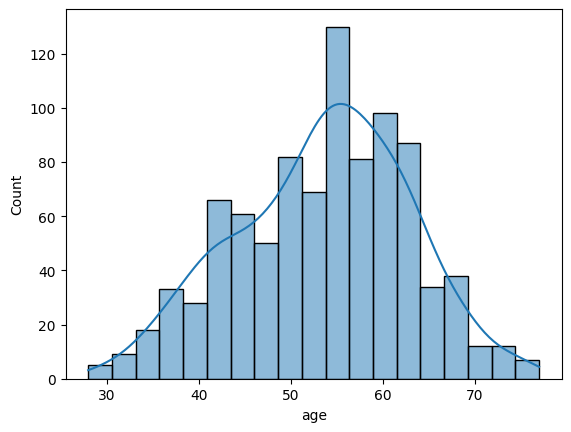

In [11]:
# plot the Histplot of the age column using Seaborn Libarary
sns.histplot(df['age'], kde=True)

Mean of age column:  53.51086956521739
Median of age column:  54.0
Mode of age column:  54


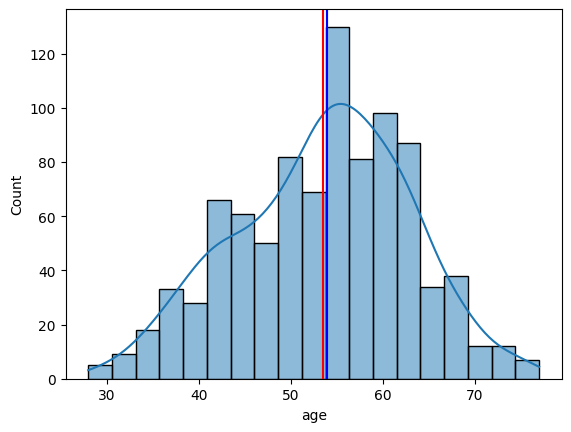

In [12]:
# plot the Histplot of the age column using Seaborn Libarary
sns.histplot(df['age'], kde=True)
# plot the mean,median,mode of the age column using matplotlib
plt.axvline(df['age'].mean(), color='red')
plt.axvline(df['age'].median(), color='green')
plt.axvline(df['age'].mode()[0], color='blue')
# Print the mean,median,mode of the age column
print("Mean of age column: ", df['age'].mean())
print("Median of age column: ", df['age'].median())
print("Mode of age column: ", df['age'].mode()[0])

### **Lets Explore the gender based on age column**

In [13]:
# Lets plot the Histogram plot by coloring on the basis of sex using plotly
fig=px.histogram(data_frame=df, x='age', color='sex')
fig.show()

In [14]:
# Applying the groupby function to check the males and Females get the HeartDisease at whch age
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [15]:
df['sex'].value_counts()

,count
sex,
Male,726
Female,194


In [16]:
# Calculate the percentage of male and female by first calculating the male and female count
male_count=726
Female_count=194
total_count=male_count-Female_count
# Calculate the percentage of male and Female
percentage_male = (male_count / total_count) * 100
percentage_Female = (Female_count / total_count) * 100
# Display the Male and Female percentages present in the Dataset
print(f"The percentage of male is: {percentage_male:.2f}%")
print(f"The percentage of Female is: {percentage_Female:.2f}%")
# Calculate the Difference
Difference_percentage=(male_count-Female_count)/(Female_count)*100
# Print the Difference in percentage of Male and Female
print(f"percentage_male is {Difference_percentage: .2f}% more than female_percentage")

The percentage of male is: 136.47%
The percentage of Female is: 36.47%
percentage_male is  274.23% more than female_percentage


### **Lets Explore the dataset column**

In [17]:
# Lets check the unique values of Dataset column
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [18]:
# Lets Explore the dataset column
df['dataset'].value_counts()

,count
dataset,
Cleveland,304
Hungary,293
VA Long Beach,200
Switzerland,123


In [19]:
# Plot the count plot of the dataset column by coluring with sex using seaborn
# sns.countplot(df, x='dataset', hue='sex')
# plot the barplot of dataset column by coluring with sex using plotly
fig=px.bar(df, x='dataset', color='sex')
fig.show()
# print the value counts of the Dataset Grouped by sex
print(df.groupby('dataset')['sex'].value_counts())



dataset        sex   
Cleveland      Male      207
               Female     97
Hungary        Male      212
               Female     81
Switzerland    Male      113
               Female     10
VA Long Beach  Male      194
               Female      6
Name: count, dtype: int64


In [20]:
# plot the histogram of age column by coluring with dataset using plotly
fig=px.histogram(data_frame=df, x='age', color='dataset')
fig.show()

In [21]:
# print the mean,median,mode of the age column grouped by dataset column
print('The Mean of Data set:',df.groupby('dataset')['age'].mean())
print('--------------------------')
print('The Median of Data set:',df.groupby('dataset')['age'].median())
print('--------------------------')
print('The Mode of Data set:',df.groupby('dataset')['age'].agg(pd.Series.mode))

The Mean of Data set: dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
--------------------------
The Median of Data set: dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
--------------------------
The Mode of Data set: dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


### **Lets Explore the cp(chest pain)column**

In [22]:
df['cp'].value_counts()

,count
cp,
asymptomatic,496
non-anginal,204
atypical angina,174
typical angina,46


In [23]:
# Lets Apply the groupby function on cp and age column
df.groupby('cp')['sex'].value_counts()

cp               sex   
asymptomatic     Male      426
                 Female     70
atypical angina  Male      113
                 Female     61
non-anginal      Male      151
                 Female     53
typical angina   Male       36
                 Female     10
Name: count, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

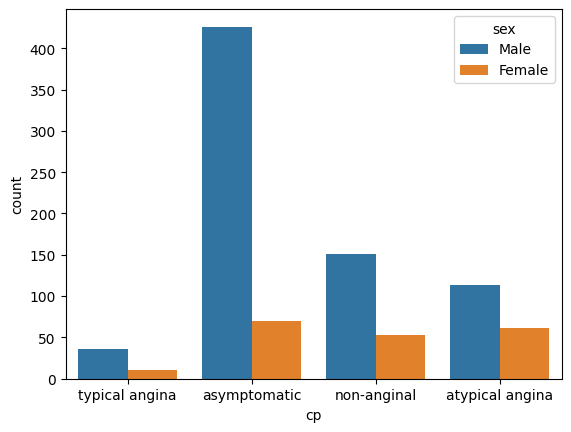

In [24]:
# plot the count plot of the cp column on the basis of age using the seaborn
sns.countplot(df, x='cp', hue='sex')

<Axes: xlabel='cp', ylabel='count'>

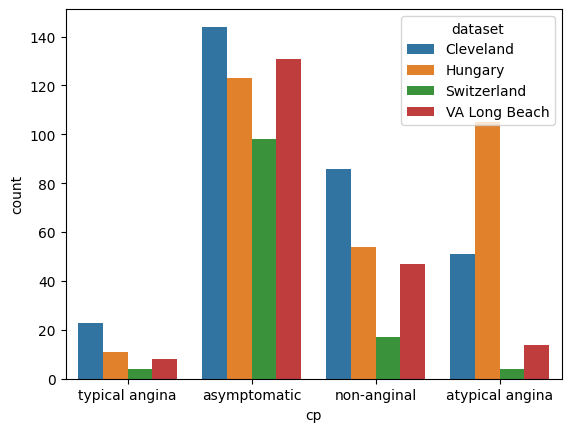

In [25]:
# plot the count plot of the cp column on the basis of dataset column using the seaborn
sns.countplot(df, x='cp', hue='dataset')

In [26]:
# plot the Histogrram of cp column based on sex
fig=px.histogram(data_frame=df, x='age', color='cp')
fig.show()

### **Lets Explore the trestbps column**

In [27]:
df['trestbps'].describe()

,trestbps
count,861.000000
mean,132.132404
std,19.066070
min,0.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,200.000000


In [28]:
df['trestbps'].unique()

array([145., 160., 120., 130., 140., 172., 150., 110., 132., 117., 135.,
       112., 105., 124., 125., 142., 128., 170., 155., 104., 180., 138.,
       108., 134., 122., 115., 118., 100., 200.,  94., 165., 102., 152.,
       101., 126., 174., 148., 178., 158., 192., 129., 144., 123., 136.,
       146., 106., 156., 154., 114., 164.,  98., 190.,  nan, 113.,  92.,
        95.,  80., 185., 116.,   0.,  96., 127.])

In [29]:
df.isnull().sum().sort_values(ascending=False)
missing_data_cols=df.isnull().sum()[df.isnull().sum()>0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [30]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


<span style="font-weight: bold; color: Red; font-size: 35px;">Dealing with Missing Values</span>

In [31]:
cat_cols=['sex','dataset','cp','fbs','restecg','exang','slope','thal','trestbps_bins','num_bins']
bool_cols=['fbs','exang']
numeric_cols=['id','age','trestbps','chol','thalch','oldpeak','ca','num']

# print the cat_cols,bool_cols,numeric_cols
print('Categorical Variables:',cat_cols)
print('Binary Variables:', bool_cols)
print('Numeric Variables:', numeric_cols)

Categorical Variables: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'trestbps_bins', 'num_bins']
Binary Variables: ['fbs', 'exang']
Numeric Variables: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


In [32]:
def impute_categorical_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

In [33]:
def impute_continuous_missing_data(passed_col):

    # ... (rest of your function code) ...

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    # Calculate RMSE without using the 'squared' argument
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("RMSE =", rmse, "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    # ... (rest of your function code) ...

In [34]:
df.groupby('trestbps')['sex'].value_counts()

trestbps  sex   
0.0       Male      1
80.0      Male      1
92.0      Male      1
94.0      Female    1
          Male      1
                   ..
185.0     Male      1
190.0     Male      2
192.0     Male      1
200.0     Female    2
          Male      2
Name: count, Length: 98, dtype: int64

### **Feature Engineering**

In [35]:
# Lets do the Feature Engineering of the trestbps column and create new column on the basis of very_low, low, normal, high, very_high
bins=[0,60,80,130, 135, 140]
labels=['very_low', 'low','Normal', 'high', 'very_high']
df['trestbps_bins']=pd.cut(df['trestbps'], bins=bins, labels=labels)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,trestbps_bins
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,NaN
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,NaN
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,Normal
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,Normal
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,Normal


In [36]:
# Lets impute the missing values of trestos with mode
df['trestbps_bins'].fillna(df['trestbps_bins'].mode()[0], inplace=True)
df['trestbps_bins'].isnull().sum()
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,trestbps_bins
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,Normal
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,Normal
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,Normal
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,Normal
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,Normal


<Axes: xlabel='trestbps', ylabel='Count'>

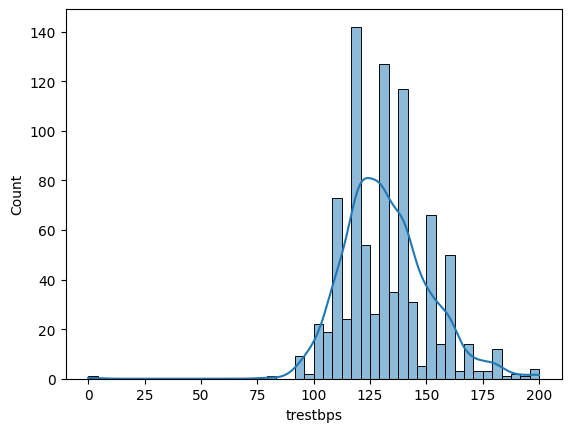

In [37]:
sns.histplot(df, x='trestbps', kde=True)

In [38]:
# Check the value_counts of trestbps column by groupby with sex column to check the resting Blood Pressure oon the basis of sex
df.groupby('trestbps_bins')['sex'].value_counts()


trestbps_bins  sex   
very_low       Female      0
               Male        0
low            Male        1
               Female      0
Normal         Male      599
               Female    156
high           Male       29
               Female     10
very_high      Male       97
               Female     28
Name: count, dtype: int64

In [39]:
fig=px.histogram(df, x='trestbps', color='sex')
fig.show()

### **Lets Explore the chol column**

In [40]:
df['chol'].describe()

,chol
count,890.000000
mean,199.130337
std,110.780810
min,0.000000
25%,175.000000
50%,223.000000
75%,268.000000
max,603.000000


In [41]:
df.groupby('chol')['sex'].value_counts()

chol   sex   
0.0    Male      161
       Female     11
85.0   Male        1
100.0  Male        2
117.0  Male        1
                ... 
491.0  Male        1
518.0  Male        1
529.0  Male        1
564.0  Female      1
603.0  Male        1
Name: count, Length: 319, dtype: int64

In [42]:
fig=px.histogram(data_frame=df, x='chol', color='sex')
fig.show()

In [43]:
df['fbs'].value_counts()

,count
fbs,
False,692
True,138


In [44]:
df.groupby('fbs')['sex'].value_counts()

fbs    sex   
False  Male      528
       Female    164
True   Male      119
       Female     19
Name: count, dtype: int64

In [45]:
df.groupby('fbs')['age'].value_counts()

fbs    age
False  54     42
       55     32
       58     31
       52     27
       59     26
              ..
True   42      1
       45      1
       70      1
       71      1
       72      1
Name: count, Length: 82, dtype: int64

In [46]:
fig=px.bar(data_frame=df, x='fbs', y='age', color='sex')
fig.show()

In [47]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,trestbps_bins
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,Normal
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,Normal
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,Normal
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,Normal
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,Normal


In [48]:
df['restecg'].value_counts()


,count
restecg,
normal,551
lv hypertrophy,188
st-t abnormality,179


In [49]:
df['restecg']=df['restecg'].apply(lambda x:x.replace(' ', '-')if ' ' in str(x) else x)

In [50]:
df.groupby('restecg')['sex'].value_counts()

restecg           sex   
lv-hypertrophy    Male      141
                  Female     47
normal            Male      432
                  Female    119
st-t-abnormality  Male      151
                  Female     28
Name: count, dtype: int64

In [51]:
fig=px.histogram(data_frame=df, x='age', color='restecg')
fig.show()

In [52]:
df['thalch'].describe()

,thalch
count,865.000000
mean,137.545665
std,25.926276
min,60.000000
25%,120.000000
50%,140.000000
75%,157.000000
max,202.000000


In [53]:
fig=px.histogram(data_frame=df, x='thalch', color='sex')
fig.show()

In [54]:
# lets explore the exang column
df['exang'].value_counts()

,count
exang,
False,528
True,337


In [55]:
df.groupby('exang')['sex'].value_counts()

exang  sex   
False  Male      379
       Female    149
True   Male      294
       Female     43
Name: count, dtype: int64

In [56]:
# Lets explore the exang column
df['oldpeak'].describe()

,oldpeak
count,858.000000
mean,0.878788
std,1.091226
min,-2.600000
25%,0.000000
50%,0.500000
75%,1.500000
max,6.200000


<Axes: ylabel='oldpeak'>

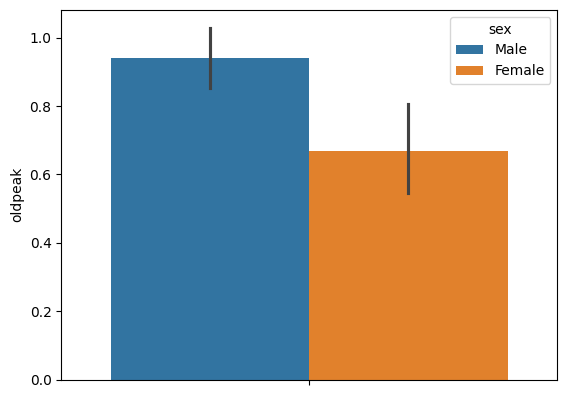

In [57]:
# plot the hist plot of exang column using seaborn
sns.barplot(df, y='oldpeak', hue='sex')

In [58]:
df['slope'].value_counts()

,count
slope,
flat,345
upsloping,203
downsloping,63


In [59]:
fig=px.histogram(data_frame=df, x='age', color='slope')
fig.show()

### **Lets Explore ca column**

In [60]:
# Lets Explore the ca column
df['ca'].describe()

,ca
count,309.000000
mean,0.676375
std,0.935653
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,3.000000


### **Lets Explore thal column**

In [61]:
# Lets explore the thal column
df['thal'].value_counts()

,count
thal,
normal,196
reversable defect,192
fixed defect,46


In [62]:
df['thal']=df['thal'].apply(lambda x:x.replace(' ', '-')if ' ' in str(x) else x)

In [63]:
# calculatr the value counts of thal column by groupby with sex column
df.groupby('thal')['sex'].value_counts()

thal               sex   
fixed-defect       Male       42
                   Female      4
normal             Male      110
                   Female     86
reversable-defect  Male      171
                   Female     21
Name: count, dtype: int64

In [64]:
fig=px.histogram(data_frame=df, x='sex', color='thal')
fig.show()

### **Lets Explore the num column**

`num column:`\
0 = no heart disease\
1 = mild heart disease\
2 = moderate heart disease\
3 = severe heart disease\
4 = critical heart disease

In [65]:
bins=[0,1,2,3,4]
labels=['No-Heart-Disease', 'Mild-Heart-Disease', 'Moderate-Heart-Disease', 'Severe-Heart-Disease']
df['num_bins']=pd.cut(df['num'], bins=bins, labels=labels)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,trestbps_bins,num_bins
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv-hypertrophy,150.0,False,2.3,downsloping,0.0,fixed-defect,0,Normal,NaN
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv-hypertrophy,108.0,True,1.5,flat,3.0,normal,2,Normal,Mild-Heart-Disease
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv-hypertrophy,129.0,True,2.6,flat,2.0,reversable-defect,1,Normal,No-Heart-Disease
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,Normal,NaN
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv-hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,Normal,NaN


In [66]:
df['num_bins'].fillna(df['num_bins'].mode()[0], inplace=True)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,trestbps_bins,num_bins
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv-hypertrophy,150.0,False,2.3,downsloping,0.0,fixed-defect,0,Normal,No-Heart-Disease
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv-hypertrophy,108.0,True,1.5,flat,3.0,normal,2,Normal,Mild-Heart-Disease
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv-hypertrophy,129.0,True,2.6,flat,2.0,reversable-defect,1,Normal,No-Heart-Disease
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,Normal,No-Heart-Disease
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv-hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,Normal,No-Heart-Disease


In [67]:
df['num'].value_counts()

,count
num,
0,411
1,265
2,109
3,107
4,28


In [68]:
df.groupby('num')['sex'].value_counts()

num  sex   
0    Male      267
     Female    144
1    Male      235
     Female     30
2    Male       99
     Female     10
3    Male       99
     Female      8
4    Male       26
     Female      2
Name: count, dtype: int64

<span style="font-weight: bold; color: Red; font-size: 35px;">Dealing with Outliers</span>

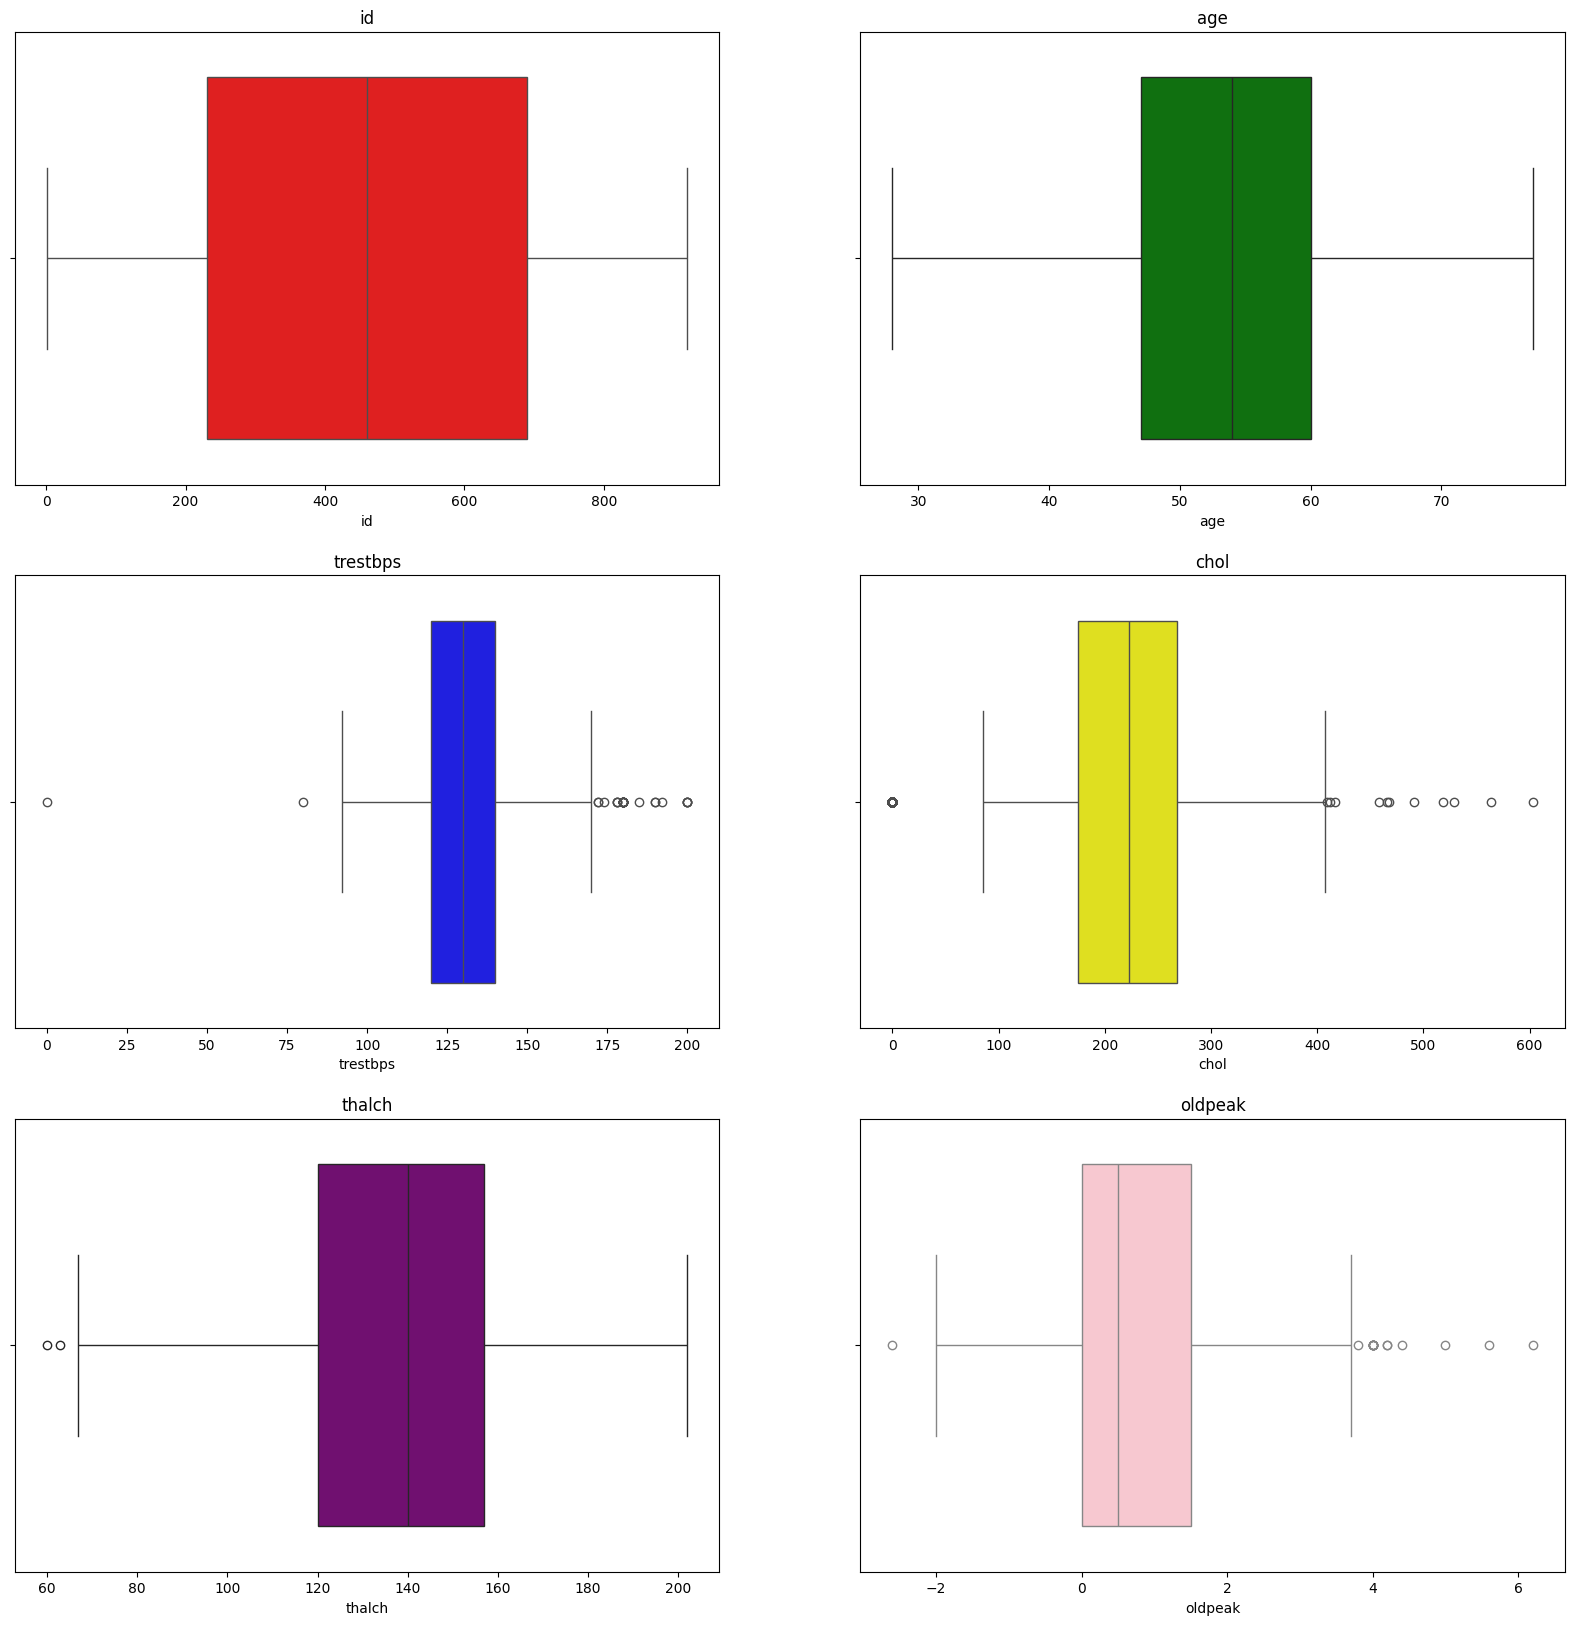

In [69]:
plt.figure(figsize=(20, 20))
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'pink']
numeric_cols = numeric_cols[:6]  # Ensure the number of columns is not more than 6
for i, col in enumerate(numeric_cols):
    ax = plt.subplot(3, 2, i + 1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)
plt.show()

In [70]:
fig=px.box(data_frame=df, y='id')
fig.show()
fig=px.box(data_frame=df, y='age')
fig.show()
fig=px.box(data_frame=df, y='trestbps')
fig.show()
fig=px.box(data_frame=df, y='chol')
fig.show()
fig=px.box(data_frame=df, y='thalch')
fig.show()
fig=px.box(data_frame=df, y='oldpeak')
fig.show()


In [71]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,trestbps_bins,num_bins
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv-hypertrophy,150.0,False,2.3,downsloping,0.0,fixed-defect,0,Normal,No-Heart-Disease
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv-hypertrophy,108.0,True,1.5,flat,3.0,normal,2,Normal,Mild-Heart-Disease
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv-hypertrophy,129.0,True,2.6,flat,2.0,reversable-defect,1,Normal,No-Heart-Disease
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,Normal,No-Heart-Disease
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv-hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,Normal,No-Heart-Disease


In [72]:
# check the row where trestbps is 0
df[df['trestbps']==0]
# Remove the row where trestbps is not equal to zero
df=df[df['trestbps']!=0]
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,trestbps_bins,num_bins
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv-hypertrophy,150.0,False,2.3,downsloping,0.0,fixed-defect,0,Normal,No-Heart-Disease
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv-hypertrophy,108.0,True,1.5,flat,3.0,normal,2,Normal,Mild-Heart-Disease
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv-hypertrophy,129.0,True,2.6,flat,2.0,reversable-defect,1,Normal,No-Heart-Disease
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,Normal,No-Heart-Disease
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv-hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,Normal,No-Heart-Disease


<span style="font-weight: bold; color: Red; font-size: 35px;">Machine Learning</span>

### **Label Encoding**

In [73]:
# lets encode the sex column using label encoder
le_sex=LabelEncoder()
df['sex']=le_sex.fit_transform(df[['sex']])
# lets encode the dataset column using label encoder
le_dataset=LabelEncoder()
df['dataset']=le_dataset.fit_transform(df[['dataset']])
# lets encode the cp column using label encoder
le_cp=LabelEncoder()
df['cp']=le_cp.fit_transform(df[['cp']])
# lets encode the fbs column using label encoder
le_fbs=LabelEncoder()
df['fbs']=le_fbs.fit_transform(df[['fbs']])
# lets encode the trestecg column using label encoder
le_restecg=LabelEncoder()
df['restecg']=le_restecg.fit_transform(df[['restecg']])
# lets encode the exang column using label encoder
le_exang=LabelEncoder()
df['exang']=le_exang.fit_transform(df[['exang']])
# lets encode the slope column using label encoder
le_slope=LabelEncoder()
df['slope']=le_slope.fit_transform(df[['slope']])
# lets encode the thal column using label encoder
le_thal=LabelEncoder()
df['thal']=le_thal.fit_transform(df[['thal']])
# lets encode the trest_bins column using label encoder
le_trestbps_bins=LabelEncoder()
df['trestbps_bins']=le_trestbps_bins.fit_transform(df[['trestbps_bins']])
le_num_bins=LabelEncoder()
df['num_bins']=le_trestbps_bins.fit_transform(df[['num_bins']])
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,trestbps_bins,num_bins
0,1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0,0,2
1,2,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,2,0,0
2,3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1,0,2
3,4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0,0,2
4,5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0,0,2


### **Scaling**

In [74]:
scalar=StandardScaler()
df[numeric_cols]=scalar.fit_transform(df[numeric_cols])

### **Transformation**

In [75]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
pt_boxcox=PowerTransformer(standardize=True)
df[numeric_cols]=pt_boxcox.fit_transform(df[numeric_cols])
pt_yeojohnson=PowerTransformer(standardize=True)
df[numeric_cols]=pt_yeojohnson.fit_transform(df[numeric_cols])
qt_normal=QuantileTransformer(output_distribution='normal', random_state=42)
df[numeric_cols]=qt_normal.fit_transform(df[numeric_cols])

The Target column is `num` which is the predicted attribute.We will use this column to predict that the heart Disease is present or not or which sort of Heart Disease is present.There are Five types of Heart Disease.\
`0 = no heart disease`\
`1 = mild heart disease`\
`2 = moderate heart disease`\
`3 = severe heart disease`\
`4 = critical heart disease`

>* Enlist all the models that you will use to predict the heart disease. These models should be classifiers for multi-class classification.

1. logistic regression
2. KNN
3. NB
4. SVM
5. Decision Tree
6. Random Forest
6. XGBoost
7. GradientBoosting
8. AdaBoost
9. lightGBM

In [76]:
%%time
# importing libarariesfor classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
#from lightgbm import LGBMClassifier # Make sure you install the lightgbm module first using !pip install lightgbm
from sklearn.model_selection import cross_val_score
# import pipeline
from sklearn.pipeline import Pipeline
import random
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
from sklearn.impute import SimpleImputer # Import SimpleImputer



# Remove Warnings
import warnings
warnings.filterwarnings('ignore')
# Disable LightGBM warnings
#warnings.filterwarnings("ignore", category=UserWarning)
#warnings.filterwarnings("ignore", category=DeprecationWarning)
#warnings.filterwarnings("ignore", message="No further splits with positive gain")

# Split the Data into X and y
X=df.drop('num', axis=1)
y=df['num']
random_state=42

# Split the Data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42,stratify=y)

# Initialize LabelEncoders for categorical features and SimpleImputer for numerical features
categorical_features = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'trestbps_bins', 'num_bins']
numerical_features = X_train.select_dtypes(include=['number']).columns # Get numerical features

encoders = {}
for feature in categorical_features:
    encoders[feature] = LabelEncoder()
    # Fit and transform on training data, then transform test data
    X_train[feature] = encoders[feature].fit_transform(X_train[feature].astype(str)) # Convert to string to handle mixed types
    X_test[feature] = encoders[feature].transform(X_test[feature].astype(str))

# Impute missing values in numerical features using SimpleImputer
imputer = SimpleImputer(strategy='median') # Or 'mean', depending on your preference
X_train[numerical_features] = imputer.fit_transform(X_train[numerical_features])
X_test[numerical_features] = imputer.transform(X_test[numerical_features])

# call the models
models = {
    'Logistic Regression': (LogisticRegression(random_state=42), {}),
    'KNN': (KNeighborsClassifier(), {'model__n_neighbors': [10, 30]}),
    'SVC': (SVC(random_state=42), {'model__gamma': ['scale', 'auto']}),
    #'DecisionTreeClassifier': (DecisionTreeClassifier(random_state=42), {'model__max_depth': [5, 10, 15]}),
    'RandomForestClassifier': (RandomForestClassifier(random_state=42), {'model__n_estimators': [100, 200, 300], 'model__max_depth': [5, 10, 15]}),
    'GradientBoostingClassifier': (GradientBoostingClassifier(random_state=42), {'model__learning_rate': [0.1, 0.01, 0.001]}),
    'AdaBoostClassifier': (AdaBoostClassifier(random_state=42), {'model__n_estimators': [50, 100, 200]}),
    'XGBClassifier': (XGBClassifier(random_state=42), {'model__max_depth': [3, 4, 5]}),
    'Naive Bayes': (GaussianNB(), {})
}
best_model=None
best_accuracy=0
for name,(models,params) in models.items():
    pipeline=Pipeline(steps=[
        ('model',models)
])
    # Apply the cross validation score
    scores=cross_val_score(pipeline, X_train, y_train,cv=5, verbose=0)
    # mean_accuracy
    mean_accuracy=scores.mean()
    # predict the pipeline
    pipeline.fit(X_train,y_train)
    # Train the pipeline
    y_pred=pipeline.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    # print the evaluation metrics
    print('Model', name)
    print('Cross_validation accuracy', mean_accuracy)
    print('accuracy', accuracy)
    print('\n')


    # Evaluate the model
    if accuracy > best_accuracy:
       best_accuracy = accuracy
       best_model = pipeline
# print the best model
print("Best Model is:", best_model)
# Save the best model
# import pickle
# pickle.dump(best_model, open('./save the models/Heart_Disese_project_pkl','wb'))

Model Logistic Regression
Cross_validation accuracy 0.8299319727891156
accuracy 0.8369565217391305


Model KNN
Cross_validation accuracy 0.6653061224489796
accuracy 0.717391304347826


Model SVC
Cross_validation accuracy 0.7863945578231293
accuracy 0.8260869565217391


Model RandomForestClassifier
Cross_validation accuracy 0.8598639455782312
accuracy 0.9130434782608695


Model GradientBoostingClassifier
Cross_validation accuracy 0.870748299319728
accuracy 0.8913043478260869


Model AdaBoostClassifier
Cross_validation accuracy 0.7115646258503402
accuracy 0.7119565217391305


Model XGBClassifier
Cross_validation accuracy 0.8625850340136054
accuracy 0.8967391304347826


Model Naive Bayes
Cross_validation accuracy 0.8163265306122449
accuracy 0.8369565217391305


Best Model is: Pipeline(steps=[('model', RandomForestClassifier(random_state=42))])
CPU times: user 14 s, sys: 122 ms, total: 14.2 s
Wall time: 13.3 s


### **Observations:**
>* bBest Model is XGBClassifier
>* Cross_validation accuracy  of XGBClassifier is 0.8911564625850341
>* accuracy of XGBClassifier 0.9347826086956522

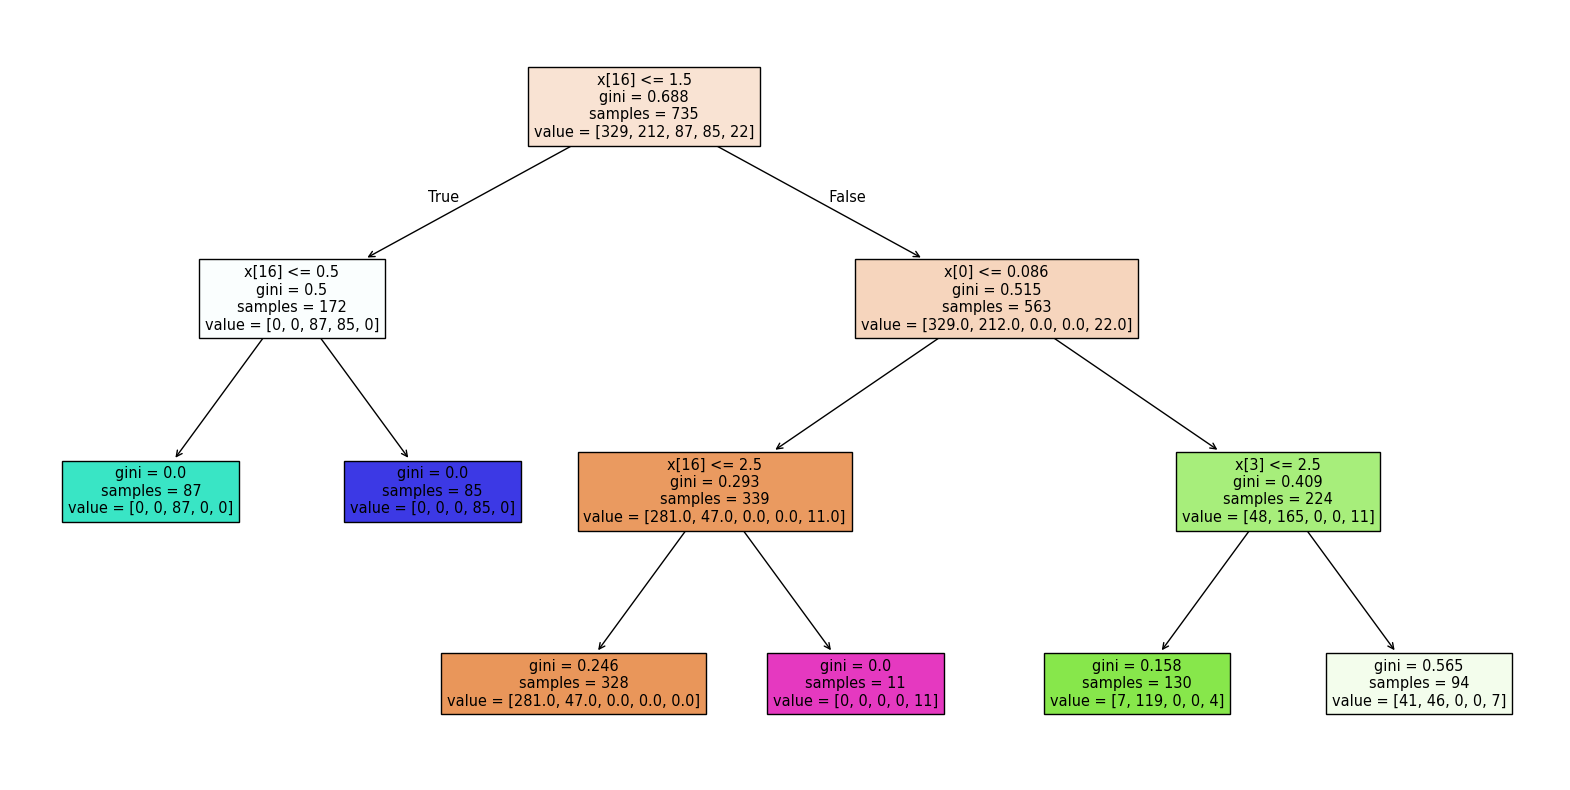

In [77]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42, max_depth=3)

# Train the classifier
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True)
plt.show()


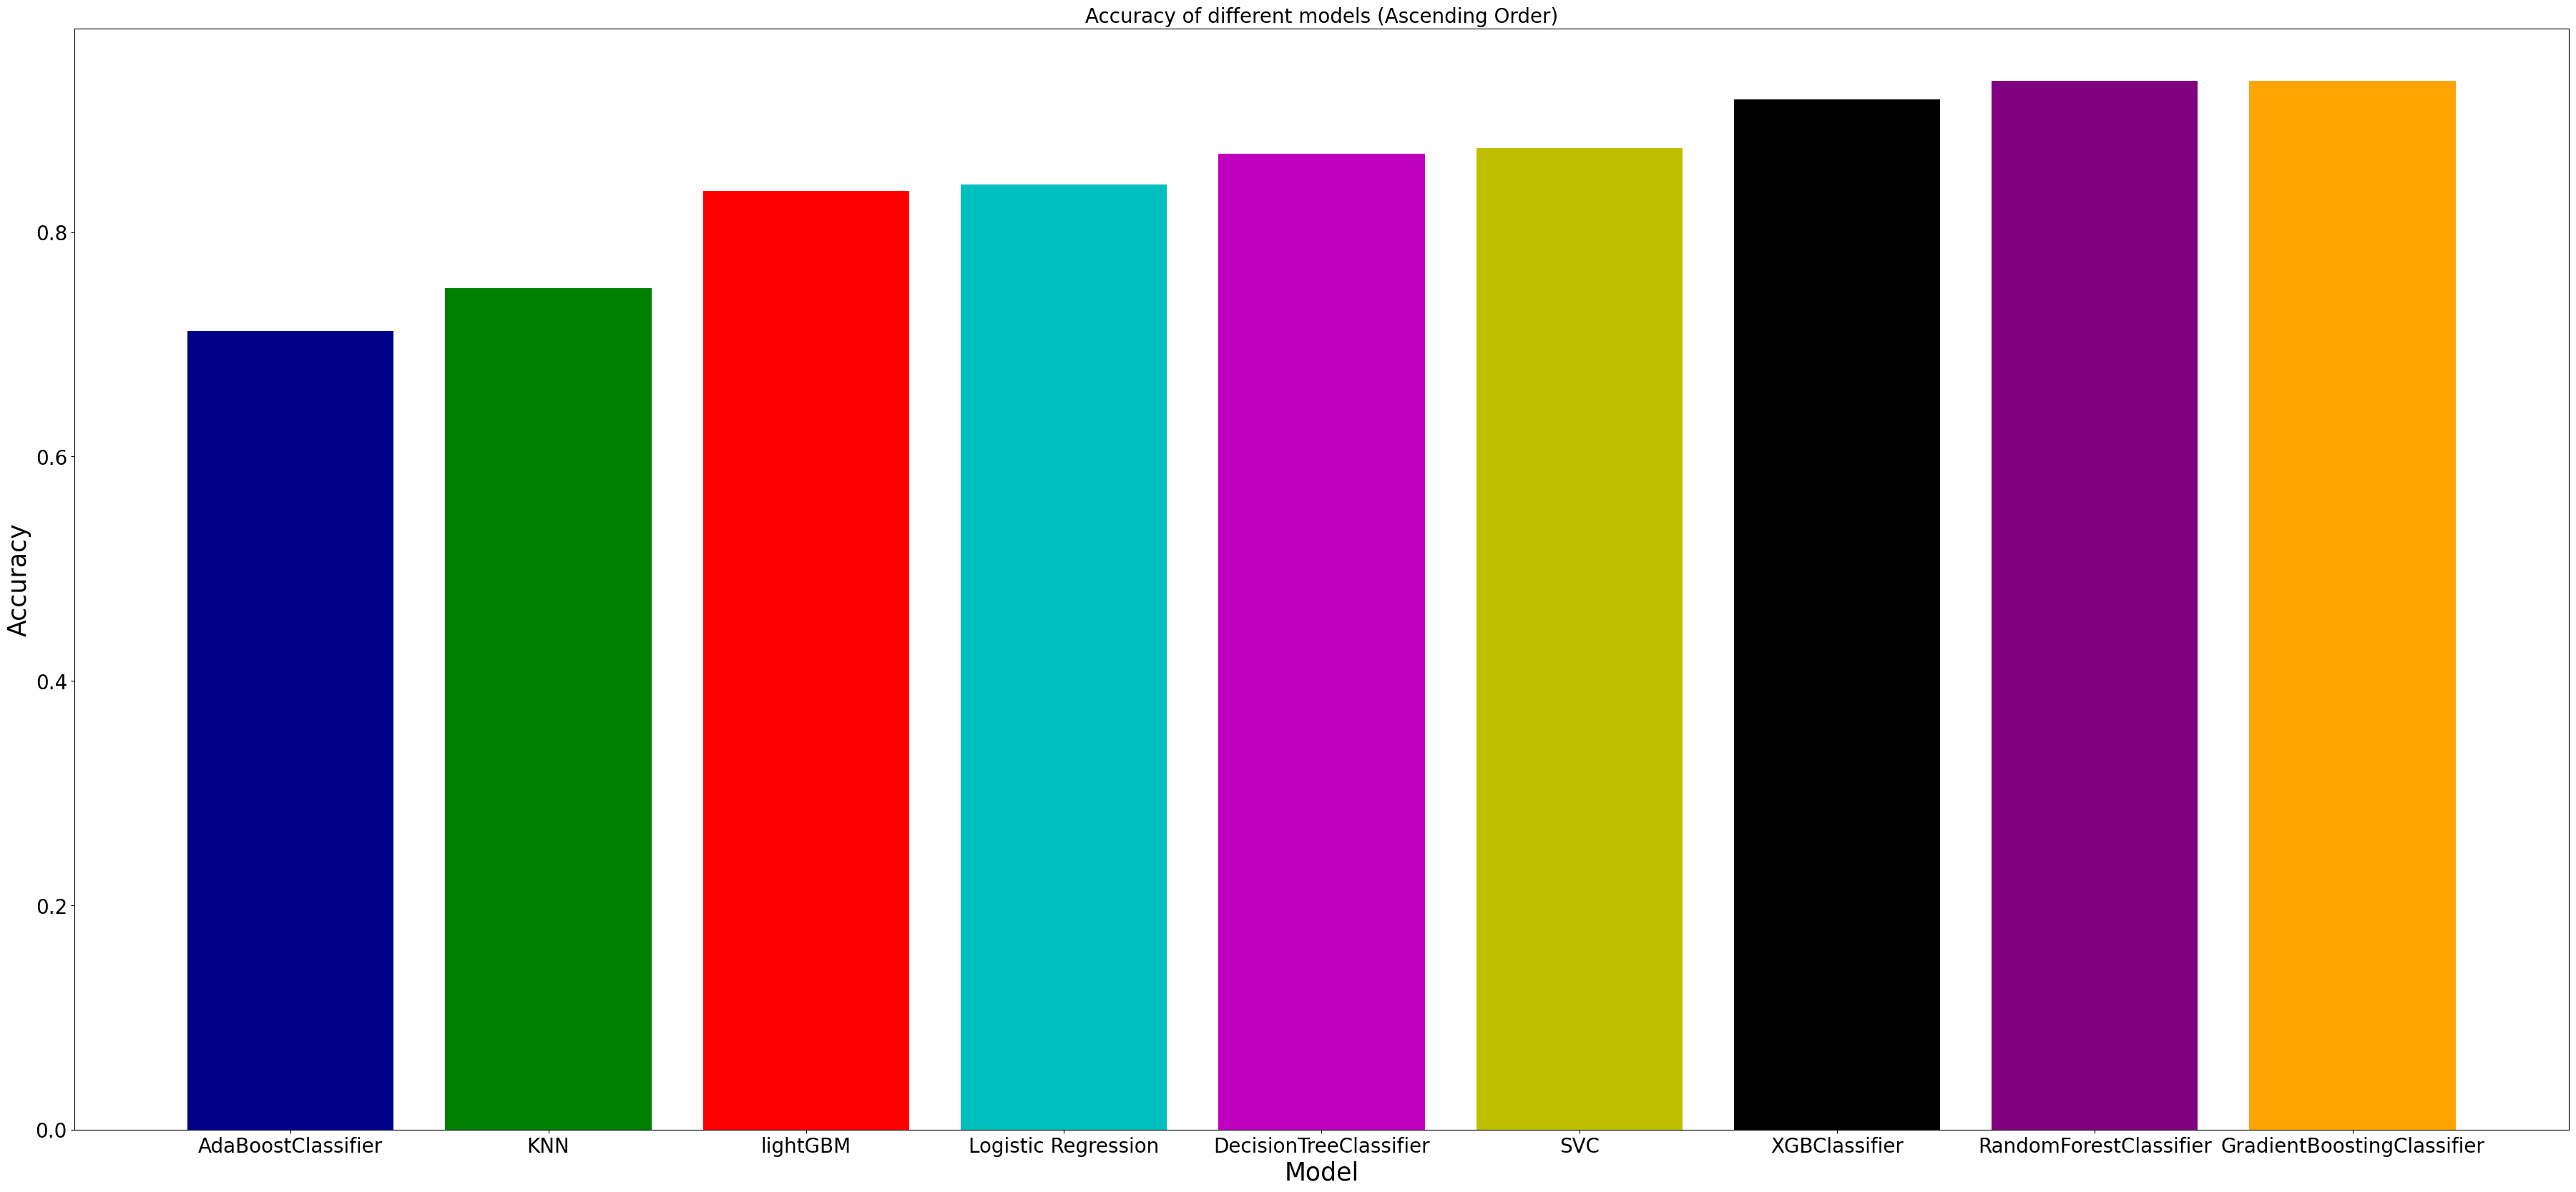

In [78]:


# Define the model names and their corresponding accuracies
model_names = ['Logistic Regression', 'KNN', 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'AdaBoostClassifier', 'XGBClassifier', 'lightGBM', 'Naive Bayes']
accuracies= [0.842391304347826,0.75,0.875,0.8695652173913043,0.9347826086956522,0.9347826086956522,0.7119565217391305,
0.9184782608695652, 0.8369565217391305
]
cross_validation_accuracies=[0.8532608695652174,0.717391304347826,0.8641304347826086,0.8641304347826086,
                             0.9293478260869565,0.9293478260869565,0.7119565217391305,
                             0.9347826086956522,0.8478260869565217]
# Sort the model names and accuracies in ascending order of accuracies
sorted_indices = sorted(range(len(accuracies)), key=lambda k: accuracies[k])
sorted_model_names = [model_names[i] for i in sorted_indices]
sorted_accuracies = [accuracies[i] for i in sorted_indices]
# Set the figure size
plt.figure(figsize=(45, 20))

# Define colors for the bars
colors = ['darkblue', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange', 'pink']
# Create a bar chart
plt.bar(sorted_model_names, sorted_accuracies, color=colors)

# Add labels and title
plt.xlabel('Model', fontsize=25)
plt.ylabel('Accuracy', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Accuracy of different models (Ascending Order)', fontsize=20)

# Show the plot
plt.show()



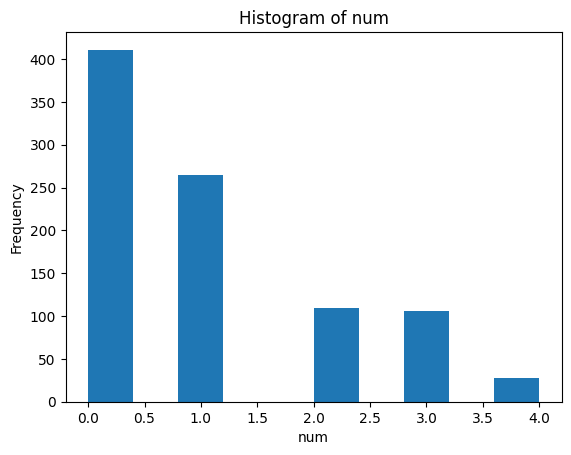

In [79]:
# plot the histogram of num column

plt.hist(df['num'])
plt.xlabel('num')
plt.ylabel('Frequency')
plt.title('Histogram of num')
plt.show()


##### **Pipeline: Data preprocess, Feature Engineering, Feature Selection, Hyperparameter Tuning, Model Selection, application and evaluation, make figures.**

In [80]:
%%time
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier


# Define the preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['age', 'trestbps', 'thalch']),
        ('cat', categorical_transformer, ['sex', 'cp', 'fbs', 'restecg', 'exang', 'trestbps_bins','num_bins'])
    ])

# Define the feature selection step
selector = SelectKBest(f_classif, k=10)

# Split the data into features (X) and target variable (y)
X = df.drop('num', axis=1)
y = df['num']

# Train-test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models and their respective parameter grids
models = {
    'Logistic Regression': (LogisticRegression(random_state=42), {}),
    'KNN': (KNeighborsClassifier(), {'model__n_neighbors': [10, 30]}),
    'SVC': (SVC(), {'model__gamma': ['scale', 'auto']}),
    'DecisionTreeClassifier': (DecisionTreeClassifier(random_state=42), {'model__max_depth': [5, 10, 15]}),
    'RandomForestClassifier': (RandomForestClassifier(random_state=42), {'model__n_estimators': [100, 200, 300], 'model__max_depth': [5, 10, 15]}),
    'GradientBoostingClassifier': (GradientBoostingClassifier(random_state=42), {'model__learning_rate': [0.1, 0.01, 0.001]}),
    'AdaBoostClassifier': (AdaBoostClassifier(random_state=42), {'model__n_estimators': [50, 100, 200]}),
    'XGBClassifier': (XGBClassifier(random_state=42), {'model__max_depth': [3, 4, 5]}),
    'Naive Bayes': (GaussianNB(), {})
}

best_model_name = None
best_model_accuracy = 0

for name, (model, params_grid) in models.items():
    # Define the pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('selector', selector),
        ('model', model)
    ])

    # Define the hyperparameters to tune
    param_grid = {
        'selector__k': [5, 7, 9, all],
        'model__n_estimators': [100, 200, 350],
        'model__max_depth': [5, 10, 15]
    }

    # Define the grid search object
    grid_search = GridSearchCV(pipeline, param_grid=params_grid, cv=5, n_jobs=-1, verbose=0)

    # Fit the grid search object to the training data
    grid_search.fit(X_train, y_train)

    # Evaluate the model on the testing data
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(name, "Accuracy:", accuracy)
    print('\n')

    # Check if this model has the best accuracy so far
    if accuracy > best_model_accuracy:
        best_model_accuracy = accuracy
        best_model_name = name

         # Print the best hyperparameters
    print(name, "Best hyperparameters:", grid_search.best_params_)
print(f"The best model is {best_model_name} with an accuracy of {best_model_accuracy}")

Logistic Regression Accuracy: 0.7771739130434783


Logistic Regression Best hyperparameters: {}
KNN Accuracy: 0.7608695652173914


KNN Best hyperparameters: {'model__n_neighbors': 10}
SVC Accuracy: 0.7989130434782609


SVC Best hyperparameters: {'model__gamma': 'scale'}
DecisionTreeClassifier Accuracy: 0.7880434782608695


DecisionTreeClassifier Best hyperparameters: {'model__max_depth': 5}
RandomForestClassifier Accuracy: 0.7771739130434783


RandomForestClassifier Best hyperparameters: {'model__max_depth': 5, 'model__n_estimators': 100}
GradientBoostingClassifier Accuracy: 0.782608695652174


GradientBoostingClassifier Best hyperparameters: {'model__learning_rate': 0.01}
AdaBoostClassifier Accuracy: 0.6793478260869565


AdaBoostClassifier Best hyperparameters: {'model__n_estimators': 50}
XGBClassifier Accuracy: 0.7771739130434783


XGBClassifier Best hyperparameters: {'model__max_depth': 3}
Naive Bayes Accuracy: 0.7880434782608695


Naive Bayes Best hyperparameters: {}
The best model

### **Observations:**
>* Best best model is SVC with an accuracy of 0.7934782608695652
>* Best hyperparameters for SVC: {'model__gamma': 'scale'}

#### **Pipeline Based on f1_score**

In [81]:
%%time
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier


# Define the preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['age', 'trestbps', 'thalch']),
        ('cat', categorical_transformer, ['sex', 'cp', 'fbs', 'restecg', 'exang', 'trestbps_bins','num_bins'])
    ])

# Define the feature selection step
selector = SelectKBest(f_classif, k=10)

# Split the data into features (X) and target variable (y)
X = df.drop('num', axis=1)
y = df['num']

# Train-test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models and their respective parameter grids
models = {
    'Logistic Regression': (LogisticRegression(random_state=42), {}),
    'KNN': (KNeighborsClassifier(), {'model__n_neighbors': [10, 30]}),
    'SVC': (SVC(), {'model__gamma': ['scale', 'auto']}),
    'DecisionTreeClassifier': (DecisionTreeClassifier(random_state=42), {'model__max_depth': [5, 10, 15]}),
    'RandomForestClassifier': (RandomForestClassifier(random_state=42), {'model__n_estimators': [100, 200, 300], 'model__max_depth': [5, 10, 15]}),
    'GradientBoostingClassifier': (GradientBoostingClassifier(random_state=42), {'model__learning_rate': [0.1, 0.01, 0.001]}),
    'AdaBoostClassifier': (AdaBoostClassifier(random_state=42), {'model__n_estimators': [50, 100, 200]}),
    'XGBClassifier': (XGBClassifier(random_state=42), {'model__max_depth': [3, 4, 5]}),
    'Naive Bayes': (GaussianNB(), {})
}

best_model_name = None
best_model_f1_score = 0

for name, (model, params_grid) in models.items():
    # Define the pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('selector', selector),
        ('model', model)
    ])

    # Define the hyperparameters to tune
    param_grid = {
        'selector__k': [5, 7, 9],
        'model__n_estimators': [100, 200, 350],
        'model__max_depth': [5, 10, 15]
    }

    # Define the grid search object
    grid_search = GridSearchCV(pipeline, param_grid=params_grid, cv=5, n_jobs=-1, scoring='f1', verbose=0)

    # Fit the grid search object to the training data
    grid_search.fit(X_train, y_train)

    # Evaluate the model on the testing data
    y_pred = grid_search.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='micro')
    print(name, "F1 score:", f1)
    print('\n')

    # Check if the current model has a higher F1 score than the previous best model
    if f1 > best_model_f1_score:
        best_model_name = name
        best_model_f1_score = f1

     # Print the best hyperparameters
    print(name, "Best hyperparameters:", grid_search.best_params_)

    # Print the best model
print("Best model:", best_model_name)





Logistic Regression F1 score: 0.7771739130434783


Logistic Regression Best hyperparameters: {}
KNN F1 score: 0.7608695652173914


KNN Best hyperparameters: {'model__n_neighbors': 10}
SVC F1 score: 0.7989130434782609


SVC Best hyperparameters: {'model__gamma': 'scale'}
DecisionTreeClassifier F1 score: 0.7880434782608695


DecisionTreeClassifier Best hyperparameters: {'model__max_depth': 5}
RandomForestClassifier F1 score: 0.7771739130434783


RandomForestClassifier Best hyperparameters: {'model__max_depth': 5, 'model__n_estimators': 100}
GradientBoostingClassifier F1 score: 0.7663043478260869


GradientBoostingClassifier Best hyperparameters: {'model__learning_rate': 0.1}
AdaBoostClassifier F1 score: 0.6793478260869565


AdaBoostClassifier Best hyperparameters: {'model__n_estimators': 50}
XGBClassifier F1 score: 0.7771739130434783


XGBClassifier Best hyperparameters: {'model__max_depth': 3}
Naive Bayes F1 score: 0.7880434782608695


Naive Bayes Best hyperparameters: {}
Best model: SV

### **Observations:**
>* Best best model is SVC with an F1 score 0.7934782608695652
>* Best hyperparameters for SVC: {'model__gamma': 'scale'}

### **Inverse Transformation**

In [82]:
df['sex']=le_sex.inverse_transform(df[['sex']])
df['dataset']=le_dataset.inverse_transform(df[['dataset']])
df['cp']=le_cp.inverse_transform(df[['cp']])
df['fbs']=le_fbs.inverse_transform(df[['fbs']])
df['restecg']=le_restecg.fit_transform(df[['restecg']])
df['exang']=le_exang.inverse_transform(df[['exang']])
df['slope']=le_slope.inverse_transform(df[['slope']])
df['thal']=le_thal.inverse_transform(df[['thal']])
df['trestbps_bins']=le_trestbps_bins.inverse_transform(df[['trestbps_bins']])
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,trestbps_bins,num_bins
0,-5.199338,1.025747,Male,Cleveland,typical angina,0.784986,0.147987,True,0,0.400955,False,1.243978,downsloping,0.0,fixed-defect,0,Mild-Heart-Disease,2
1,-3.064732,1.498563,Male,Cleveland,asymptomatic,1.415702,0.963071,False,0,-1.115337,True,0.609062,flat,3.0,normal,2,Mild-Heart-Disease,0
2,-2.851066,1.498563,Male,Cleveland,asymptomatic,-0.633904,0.086118,False,0,-0.319358,True,1.415702,flat,2.0,reversable-defect,1,Mild-Heart-Disease,2
3,-2.719607,-1.681878,Male,Cleveland,non-anginal,-0.001365,0.405398,False,1,2.354633,False,1.977986,downsloping,0.0,normal,0,Mild-Heart-Disease,2
4,-2.623052,-1.206386,Female,Cleveland,atypical angina,-0.001365,-0.348228,False,0,1.321681,False,0.503833,upsloping,0.0,normal,0,Mild-Heart-Disease,2
